<a href="https://colab.research.google.com/github/Afes4/Proyecto-IA/blob/main/1_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! [ -e /content ] && pip install -Uqq fastai 

     |████████████████████████████████| 214 kB 31.3 MB/s 
     |████████████████████████████████| 61 kB 8.9 MB/s 


In [ ]:
import os
import fastai
from fastai import *
from fastai.vision.all import *
from fastai.vision.data import ImageDataLoaders

In [ ]:
bs = 64

In [ ]:
path_img = '/content/drive/MyDrive/Colab Notebooks/samples/'
fnames = get_image_files(path_img+'samples')
fnames[:5]

(#5) [Path('/content/drive/MyDrive/Colab Notebooks/samples/samples/6n6gg.png'),Path('/content/drive/MyDrive/Colab Notebooks/samples/samples/3n2b4.png'),Path('/content/drive/MyDrive/Colab Notebooks/samples/samples/dnne7.png'),Path('/content/drive/MyDrive/Colab Notebooks/samples/samples/exycn.png'),Path('/content/drive/MyDrive/Colab Notebooks/samples/samples/eng53.png')]

In [ ]:
len(fnames)

1070

In [ ]:
alist=os.listdir('/content/drive/MyDrive/Colab Notebooks/samples/samples')
for i in range(len(alist)):
    alist[i]=[alist[i]]
    for j in range(5):
        alist[i].append(alist[i][0][j])
df = pd.DataFrame(alist)

In [ ]:
alist[:5]

[['6n6gg.png', '6', 'n', '6', 'g', 'g'],
 ['3n2b4.png', '3', 'n', '2', 'b', '4'],
 ['dnne7.png', 'd', 'n', 'n', 'e', '7'],
 ['exycn.png', 'e', 'x', 'y', 'c', 'n'],
 ['eng53.png', 'e', 'n', 'g', '5', '3']]

In [ ]:
df.head()

,0,1,2,3,4,5
0,6n6gg.png,6,n,6,g,g
1,3n2b4.png,3,n,2,b,4
2,dnne7.png,d,n,n,e,7
3,exycn.png,e,x,y,c,n
4,eng53.png,e,n,g,5,3


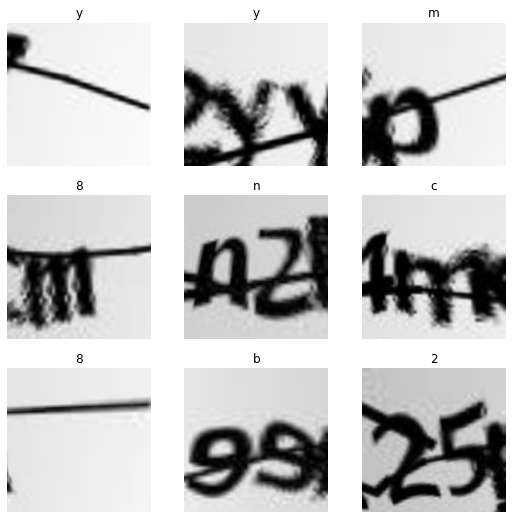

In [ ]:
data = ImageDataLoaders.from_df(df, path = '/content/drive/MyDrive/Colab Notebooks/samples/',
                         folder='samples',
                         item_tfms = Resize(160), 
                         batch_tfms = aug_transforms(size = 180))
data.show_batch()

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [ ]:
learn.path

Path('/content/drive/MyDrive/Colab Notebooks/samples')

In [ ]:
# The only difference is in the metric we pass: error_rate will not work for a multi-label problem, but we can use accuracy_thresh.
learn = cnn_learner(data, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0003311311302240938)

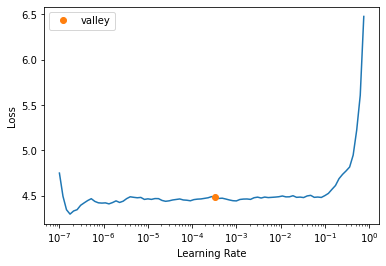

In [ ]:
learn.lr_find()

In [ ]:
lr=1e-2
learn.fit_one_cycle(20,max_lr=lr,wd=0.01)

NameError: ignored

In [ ]:
learn.save('stage-indi-1');
learn.load('stage-indi-1');
learn.path

In [ ]:
img = open_image('samples/243mm.png');
img

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
str(pred_class)

In [ ]:
pred_idx

In [ ]:
outputs

In [ ]:
#train/boatl  er
for i in range(7):
    print('number'+str(i))
    data = ImageDataLoaders.from_df('',df, folder='train_proc', size=(77,247), bs=bs,seed=43,label_col=i+1)
    learn = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False)
    lr=1e-2
    learn.fit_one_cycle(30,max_lr=lr,wd=0.01)
    
    learn.save('stage-indi-pos-'+str(i+1))

In [ ]:
test_list=os.listdir('test')

In [ ]:
data = ImageDataLoaders.from_df('',df, folder='samples', size=(77,247), bs=bs,seed=43,label_col=1)
learn1 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn1.load('stage-indi-pos-1');
data = ImageDataLoaders.from_df('',df, folder='samples', size=(77,247), bs=bs,seed=43,label_col=2)
learn2 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn2.load('stage-indi-pos-2');
data = ImageDataLoaders.from_df('',df, folder='samples', size=(77,247), bs=bs,seed=43,label_col=3)
learn3 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn3.load('stage-indi-pos-3');
data = ImageDataLoaders.from_df('',df, folder='samples', size=(77,247), bs=bs,seed=43,label_col=4)
learn4 = cnn_learner(data, models.resnet50, metrics=accuracy, ps=0.1,pretrained=False);learn4.load('stage-indi-pos-4');
data = ImageDataLoaders.from_df('',df, folder='samples', size=(77,247), bs=bs,seed=43,label_col=5)

In [ ]:
figures = []
for learner in learn_list:
    figures.append(learner.interpret().plot_top_losses(2, heatmap=True,heatmap_thresh=14,figsize=(7,2), largest=False, return_fig=True))

In [ ]:
img = open_image('samples/243mm.png')
for i in learn_list:
    pred_class,pred_idx,outputs = i.predict(img)
    print(str(pred_class))

Referencia:

https://docs.fast.ai/tutorial.vision#Multi-label-classification